In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.iloc[:,-1]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [5]:
pd.unique(data.iloc[:,-1])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

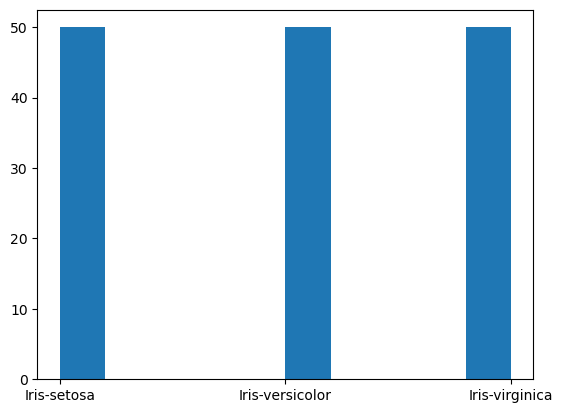

In [6]:
plt.hist(data.iloc[:,-1])

In [7]:
data1 = data.drop('Id',axis='columns')

In [8]:
data1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [11]:
pd.unique(y)

array([0, 1, 2])

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred =  classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


1.0

In [16]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]]


In [17]:
X_test.max()

2.54866119872527

In [18]:
columns = data1.columns.values.tolist()

In [19]:
columns[:-1]

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

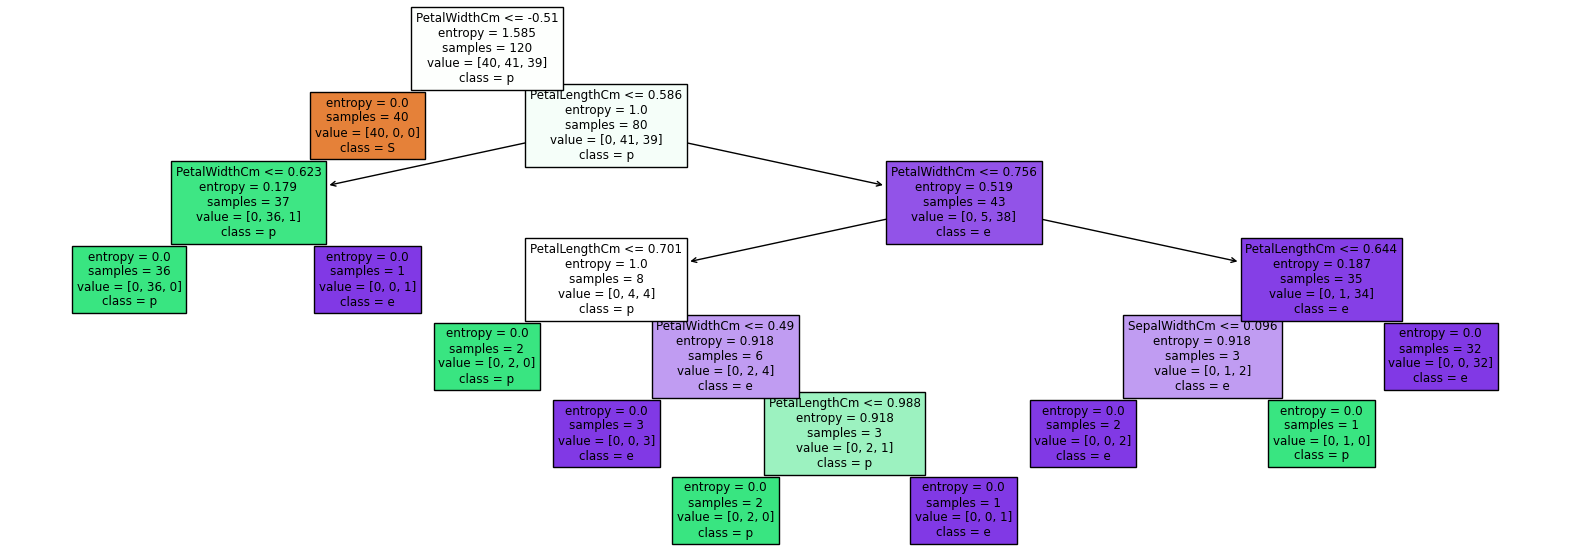

In [20]:
from sklearn import tree
fig = plt.figure(figsize=(20,7))
_ = tree.plot_tree(classifier, 
                   feature_names=data1.columns[:-1],  
                   class_names=data1.columns[-1],
                   filled=True)